In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path

# Define datasets and metrics
datasets = ['real1_Abalone', 'real2_WineQuality', 'real3_CalHousing', 
           'real4_Concrete', 'real5_BreastTumor', 'real6_echoMonths', 
           'real7_Satellite', 'real8_Triazines']
metrics = ['rhat', 'test_mse', 'pi_length', 'coverage', 'train_time']

# Results directory
results_dir = Path('results')

def load_and_summarize_metric(metric):
    """Load all dataset results for a specific metric and summarize"""
    summary_data = []
    
    for dataset in datasets:
        file_path = results_dir / f"{dataset}_{metric}.csv"
        
        if file_path.exists():
            try:
                # Read CSV file
                df = pd.read_csv(file_path)
                
                # Calculate mean and standard deviation for each column
                summary_row = {}
                summary_row['Dataset'] = dataset
                
                for column in df.columns:
                    mean_val = df[column].mean()
                    std_val = df[column].std()
                    # Format as mean(std) 
                    summary_row[column] = f"{mean_val:.4f}({std_val:.4f})"
                
                summary_data.append(summary_row)
                
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
        else:
            print(f"File not found: {file_path}")
    
    return pd.DataFrame(summary_data)


Summary for RHAT
                  MultiBART_Rhat_Sigma2 DefaultBART_Rhat_Sigma2 MultiBART_Rhat_RMSE DefaultBART_Rhat_RMSE
Dataset                                                                                                  
real1_Abalone            1.1777(0.0815)          1.2532(0.1447)      1.9475(0.2759)        1.7808(0.3485)
real2_WineQuality        1.1633(0.0687)          1.1616(0.0598)      1.5911(0.2780)        1.8126(0.3941)
real3_CalHousing         2.0734(0.2014)          2.1441(0.2683)      2.4863(0.6219)        2.6575(0.4463)
real4_Concrete           1.5379(0.2985)          1.5206(0.1747)      1.6009(0.3628)        1.7789(0.3338)
real5_BreastTumor        1.1504(0.0359)          1.3540(0.1598)      2.4505(0.2730)        2.4940(0.5220)
real6_echoMonths         1.0817(0.0476)          1.1250(0.0944)      1.9088(0.3808)        1.8317(0.4360)
real7_Satellite          1.9490(0.2285)          1.7565(0.1241)      1.9725(0.2426)        2.0135(0.2612)
real8_Triazines          1.1

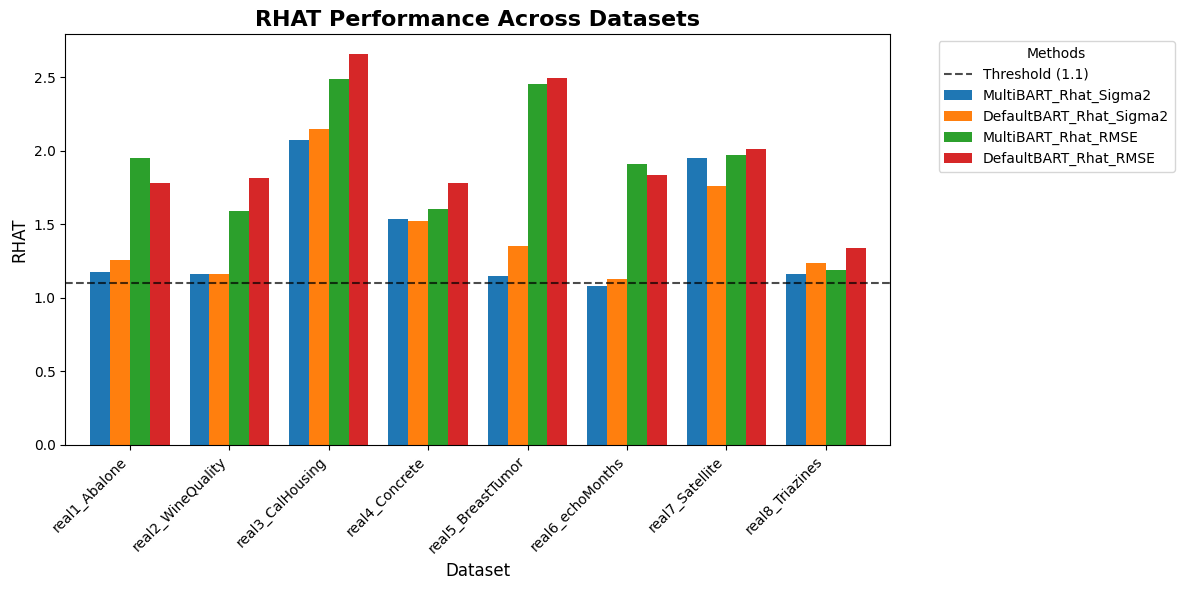


Summary for TEST_MSE
                          bart_mtmh              bart               btz                rf               xgb
Dataset                                                                                                    
real1_Abalone        5.3694(0.4028)    5.2933(0.3182)    5.3265(0.3519)    5.7526(0.3230)    5.1794(0.3714)
real2_WineQuality    0.4899(0.0197)    0.5066(0.0238)    0.5276(0.0209)    0.4542(0.0310)    0.4886(0.0218)
real3_CalHousing     0.2724(0.0124)    0.3114(0.0115)    0.5303(0.0316)    0.3211(0.0093)    0.3894(0.0106)
real4_Concrete      30.9799(2.9931)   33.4598(4.3437)   39.3074(3.7413)   34.0547(2.6135)   44.4988(3.7796)
real5_BreastTumor   88.9679(0.5229)   89.7931(0.5567)   91.2760(0.8085)  124.1059(0.8452)   92.7636(0.5269)
real6_echoMonths   132.8721(3.1844)  134.4821(2.8559)  135.9956(2.6315)  159.3945(2.9830)  136.8155(2.5468)
real7_Satellite      0.7109(0.0345)    0.7232(0.0311)    0.9709(0.0610)    0.6385(0.0398)    0.7612(0.0289)
real8_

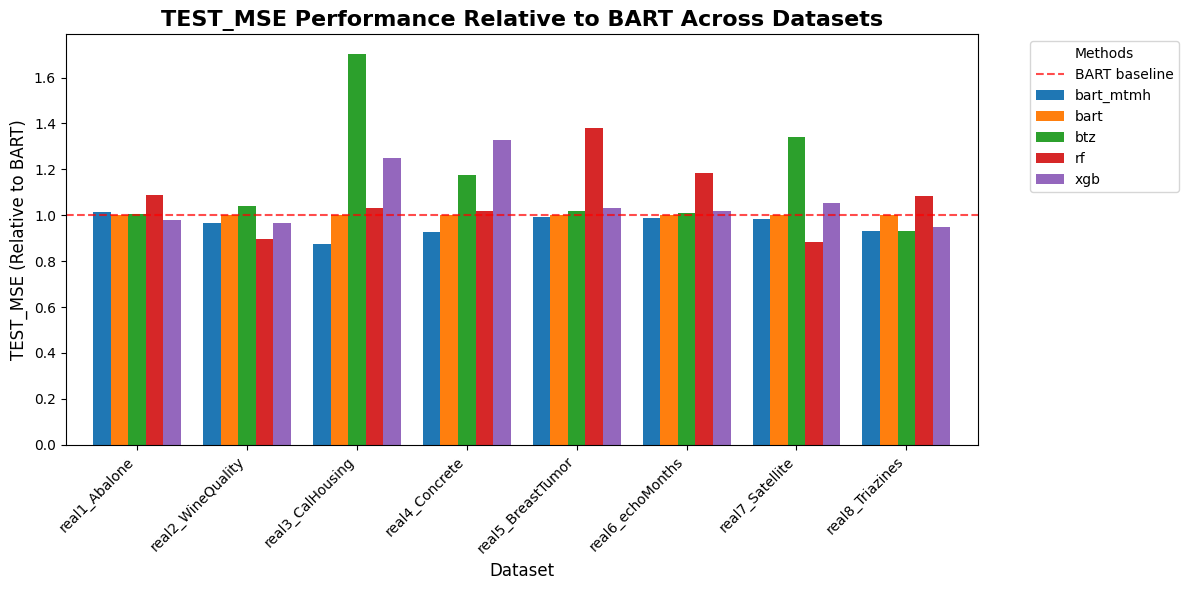


Summary for PI_LENGTH
                         bart_mtmh             bart              btz
Dataset                                                             
real1_Abalone       8.2769(0.1362)   8.4105(0.1104)   8.9335(0.1141)
real2_WineQuality   2.6566(0.0241)   2.7092(0.0281)   2.8480(0.0253)
real3_CalHousing    1.8923(0.0300)   2.1255(0.0465)   2.9544(0.1020)
real4_Concrete     19.1726(0.4092)  20.5153(0.7452)  28.7922(2.3923)
real5_BreastTumor  36.8157(0.0651)  37.0331(0.0654)  37.6545(0.1274)
real6_echoMonths   44.5532(0.1705)  45.0387(0.1575)  45.6555(0.1468)
real7_Satellite     2.5333(0.0680)   2.9487(0.0443)   3.9867(0.1309)
real8_Triazines     0.4437(0.0612)   0.4450(0.0541)   0.5277(0.0418)


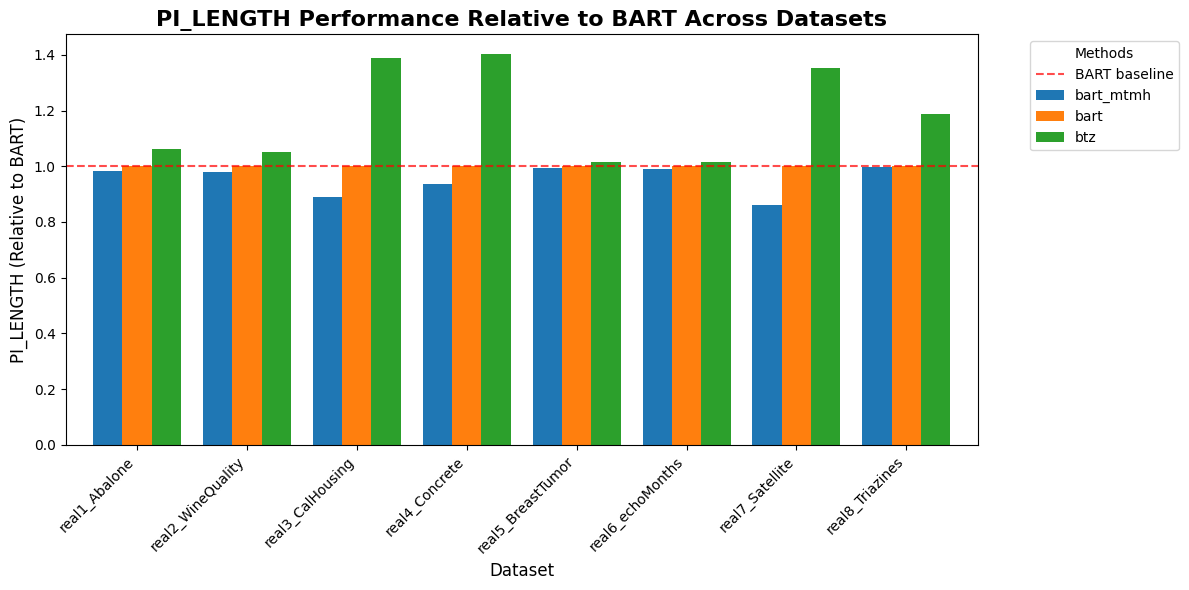


Summary for COVERAGE
                        bart_mtmh            bart             btz
Dataset                                                          
real1_Abalone      0.9261(0.0103)  0.9329(0.0067)  0.9395(0.0085)
real2_WineQuality  0.9400(0.0065)  0.9377(0.0077)  0.9444(0.0049)
real3_CalHousing   0.9345(0.0037)  0.9398(0.0028)  0.9469(0.0033)
real4_Concrete     0.9182(0.0169)  0.9264(0.0235)  0.9713(0.0114)
real5_BreastTumor  0.9371(0.0009)  0.9373(0.0009)  0.9404(0.0010)
real6_echoMonths   0.9394(0.0050)  0.9420(0.0036)  0.9448(0.0028)
real7_Satellite    0.8953(0.0060)  0.9093(0.0060)  0.9265(0.0054)
real8_Triazines    0.9234(0.0587)  0.9191(0.0574)  0.9532(0.0359)


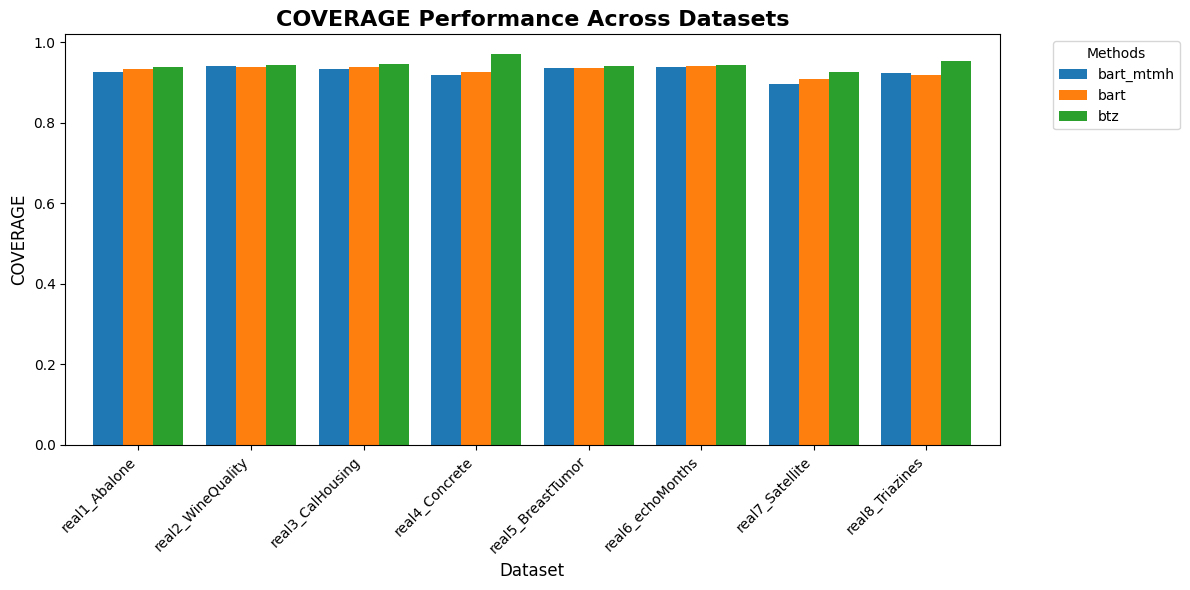


Summary for TRAIN_TIME
                          bart_mtmh             bart              btz              rf             xgb
Dataset                                                                                              
real1_Abalone       10.2614(0.3949)   1.6476(0.0911)   9.7153(0.2957)  0.0994(0.0145)  0.0555(0.0225)
real2_WineQuality   14.5007(1.6921)   1.8235(0.1296)   8.9347(2.1873)  0.2068(0.0061)  0.0325(0.0173)
real3_CalHousing   53.4603(11.5146)   5.9660(0.9131)  18.2517(0.4087)  0.9649(0.1150)  0.1162(0.0945)
real4_Concrete       7.7095(0.9824)   1.5868(0.4505)   9.7560(0.3259)  0.0271(0.0046)  0.0510(0.0085)
real5_BreastTumor  151.1082(8.6146)  27.8286(2.7495)  32.6913(5.4958)  2.0325(0.0509)  0.1737(0.0071)
real6_echoMonths    29.5315(0.8710)   3.9260(0.1474)  17.0829(1.5820)  0.9035(0.1222)  0.1786(0.1824)
real7_Satellite    32.0647(17.6178)   3.2432(0.5546)  10.9968(0.4423)  0.3492(0.0185)  0.0895(0.0039)
real8_Triazines      4.3050(0.4231)   0.8759(0.0433)   8.2

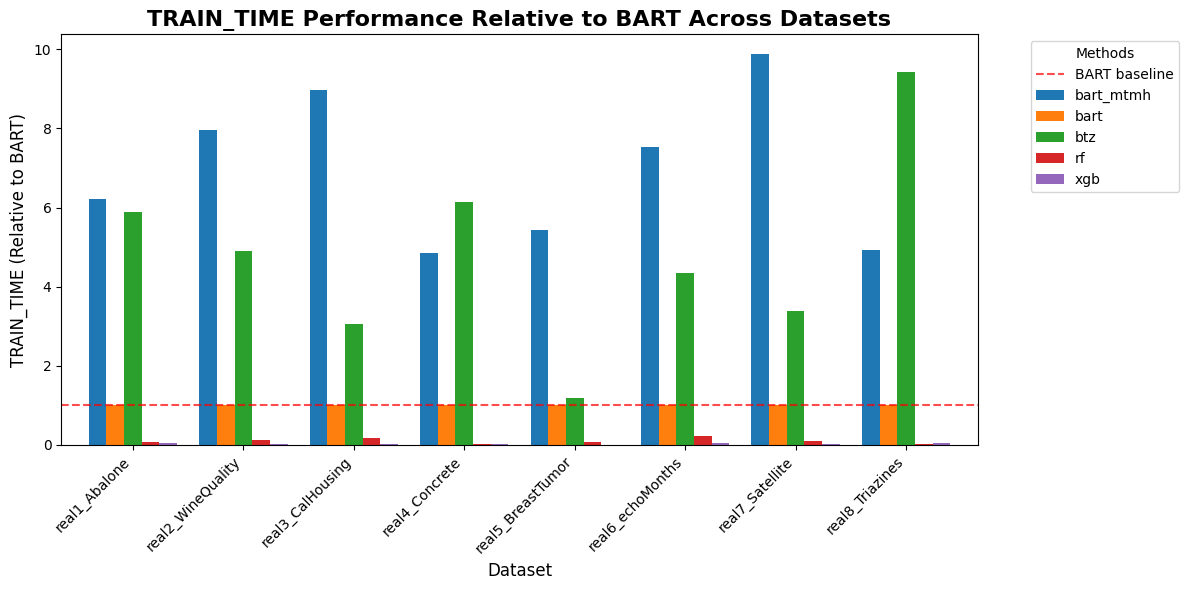

In [2]:
# Generate summary tables for each metric
import matplotlib.pyplot as plt
import seaborn as sns

for metric in metrics:
    print(f"\n{'='*50}")
    print(f"Summary for {metric.upper()}")
    print(f"{'='*50}")
    
    summary_df = load_and_summarize_metric(metric)
    
    if not summary_df.empty:
        # Set Dataset as index
        summary_df.set_index('Dataset', inplace=True)
        
        # Display table
        print(summary_df.to_string())
        
        # Create a numerical version for plotting
        plot_df = summary_df.copy()
        for col in plot_df.columns:
            # Extract mean values from "mean(std)" format
            plot_df[col] = plot_df[col].str.extract(r'(\d+\.?\d*)').astype(float)
        
        # Normalize data relative to BART performance (except for rhat and coverage)
        if metric not in ['rhat', 'coverage'] and 'bart' in plot_df.columns:
            for index in plot_df.index:
                bart_value = plot_df.loc[index, 'bart']
                if bart_value != 0:  # Avoid division by zero
                    plot_df.loc[index] = plot_df.loc[index] / bart_value
        
        # Create grouped bar chart
        fig, ax = plt.subplots(figsize=(12, 6))
        plot_df.plot(kind='bar', ax=ax, width=0.8)
        
        # Customize the plot
        if metric not in ['rhat', 'coverage']:
            ax.set_title(f'{metric.upper()} Performance Relative to BART Across Datasets', fontsize=16, fontweight='bold')
            ax.set_ylabel(f'{metric.upper()} (Relative to BART)', fontsize=12)
            # Add horizontal line at y=1 for reference
            ax.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='BART baseline')
        else:
            ax.set_title(f'{metric.upper()} Performance Across Datasets', fontsize=16, fontweight='bold')
            ax.set_ylabel(f'{metric.upper()}', fontsize=12)
            if metric == 'rhat':
                # Add horizontal line at y=1.1 for rhat
                ax.axhline(y=1.1, color='black', linestyle='--', alpha=0.7, label='Threshold (1.1)')

        
        ax.set_xlabel('Dataset', fontsize=12)
        ax.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')
        
        # Adjust layout to prevent clipping
        plt.tight_layout()
        plt.show()
        
    else:
        print(f"No data found for {metric}")

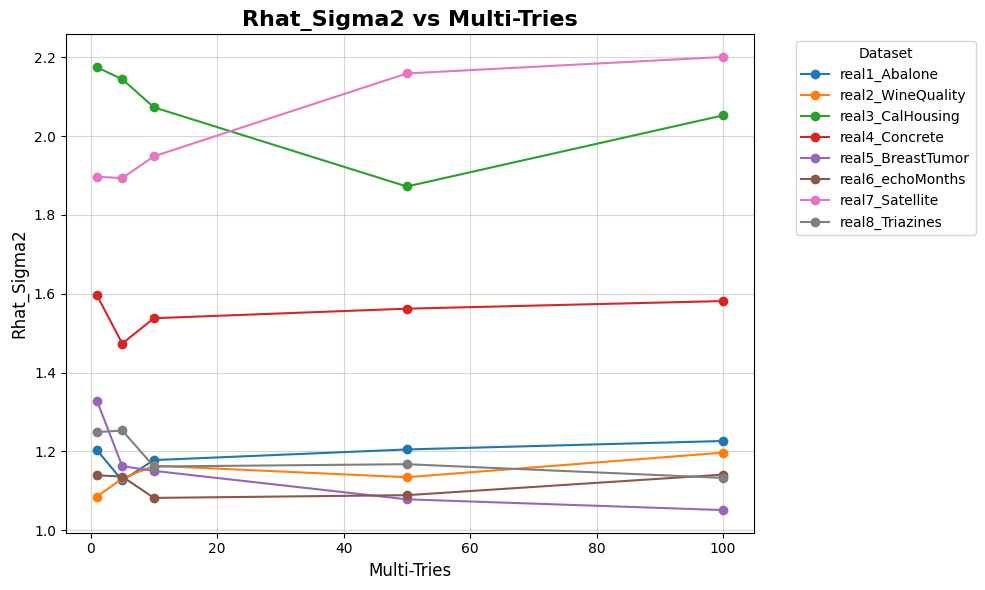

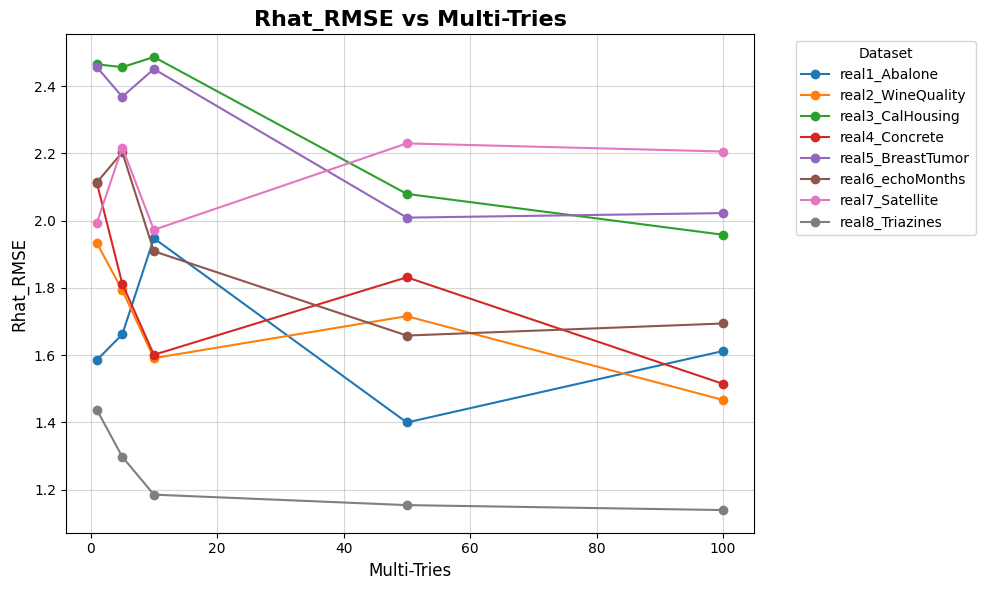

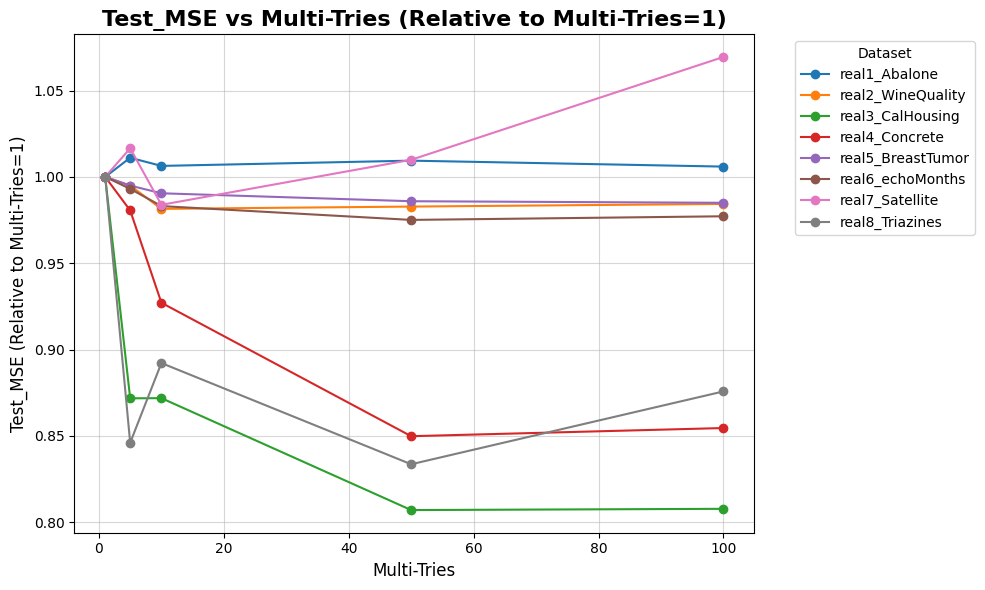

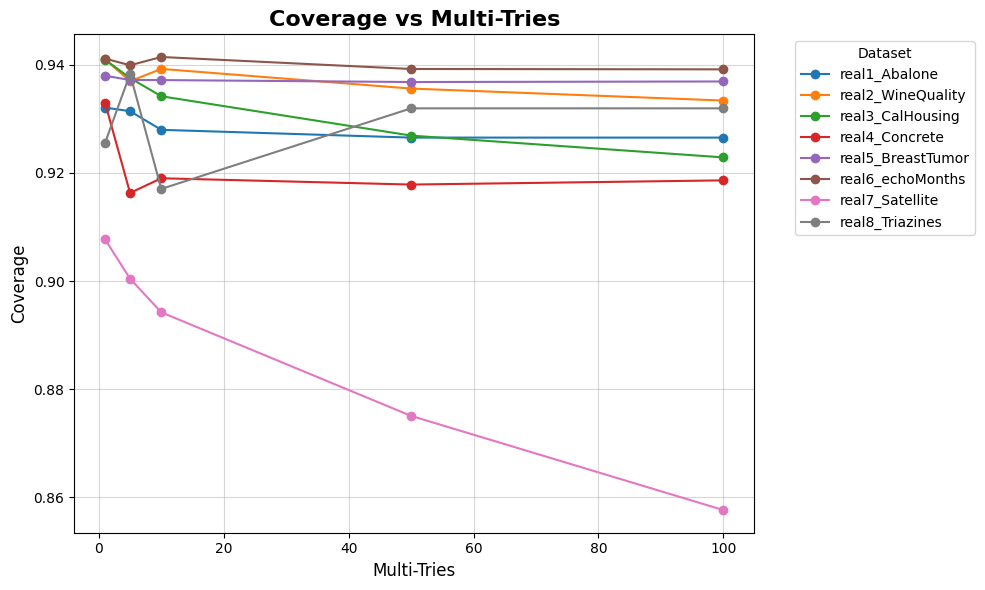

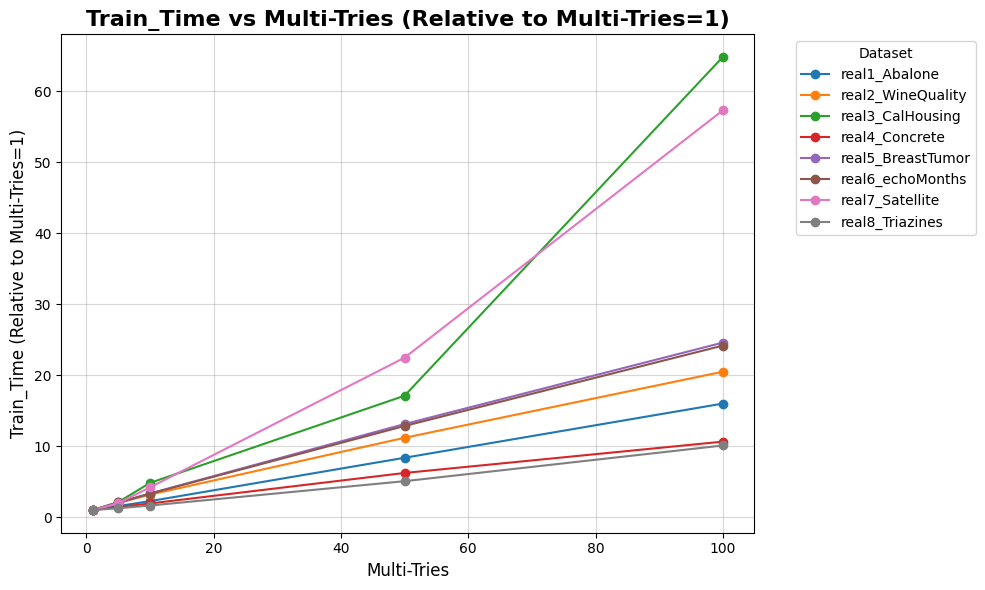

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Define datasets
datasets = ['real1_Abalone', 'real2_WineQuality', 'real3_CalHousing', 
           'real4_Concrete', 'real5_BreastTumor', 'real6_echoMonths', 
           'real7_Satellite', 'real8_Triazines']

# Results directory
results_dir = Path('results')

# Initialize a dictionary to store data for each metric
metric_data = {}

# Process each dataset's _tries.csv file
for dataset in datasets:
    file_path = results_dir / f"{dataset}_tries.csv"
    
    if file_path.exists():
        try:
            # Read the CSV file
            df = pd.read_csv(file_path)
            
            # Extract the column names (excluding the first column 'multi_tries')
            metrics = df.columns[1:]
            
            # Store the data for each metric
            for metric in metrics:
                if metric not in metric_data:
                    metric_data[metric] = []
                metric_data[metric].append((dataset, df['multi_tries'], df[metric]))
        
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    else:
        print(f"File not found: {file_path}")

# Plot each metric
for metric, data in metric_data.items():
    plt.figure(figsize=(10, 6))
    
    for dataset, multi_tries, values in data:
        # Normalize Test_MSE and Train_Time relative to their values at multi-tries=1
        if metric in ['Test_MSE', 'Train_Time']:
            values = values / values.iloc[0]
        
        plt.plot(multi_tries, values, marker='o', label=dataset)
    
    plt.xlabel('Multi-Tries', fontsize=12)
    if metric in ['Test_MSE', 'Train_Time']:
        plt.ylabel(f'{metric} (Relative to Multi-Tries=1)', fontsize=12)
        plt.title(f'{metric} vs Multi-Tries (Relative to Multi-Tries=1)', fontsize=16, fontweight='bold')
    else:
        plt.ylabel(metric, fontsize=12)
        plt.title(f'{metric} vs Multi-Tries', fontsize=16, fontweight='bold')
    plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()